# Import Libraries & Read Dataset

In [1]:
import requests

url = 'https://raw.githubusercontent.com/lko9911/Kaggle/master/Compare_Regression_models.py'

r = requests.get(url)

with open('Compare_Regression_models.py', 'w') as f:
    f.write(r.text)

In [2]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For model
from Compare_Regression_models import evaluate_models
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
file_name = '/kaggle/input/population-growth-in-india-1950-2024/macrotrends.csv'
data = pd.read_csv(file_name)

In [4]:
data.head()

,Year,Population Growth Rate,Growth Rate
0,2024,"1,441,719,852",0.92%
1,2023,"1,428,627,663",0.81%
2,2022,"1,417,173,173",0.68%
3,2021,"1,407,563,842",0.80%
4,2020,"1,396,387,127",0.96%


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    75 non-null     int64 
 1   Population Growth Rate  75 non-null     object
 2   Growth Rate             75 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [6]:
data.isna().sum()

Year                      0
Population Growth Rate    0
Growth Rate               0
dtype: int64

# Data Preprocessing

In [7]:
data['Population Growth Rate'] = data['Population Growth Rate'].str.replace(',', '').astype(int)
data['Growth Rate'] = data['Growth Rate'].str.rstrip('%').astype(float)
data

,Year,Population Growth Rate,Growth Rate
0,2024,1441719852,0.92
1,2023,1428627663,0.81
2,2022,1417173173,0.68
3,2021,1407563842,0.80
4,2020,1396387127,0.96
...,...,...,...
70,1954,389731406,2.23
71,1953,381227705,2.21
72,1952,372997188,2.21
73,1951,364922360,2.21


# EDA : Data visualization

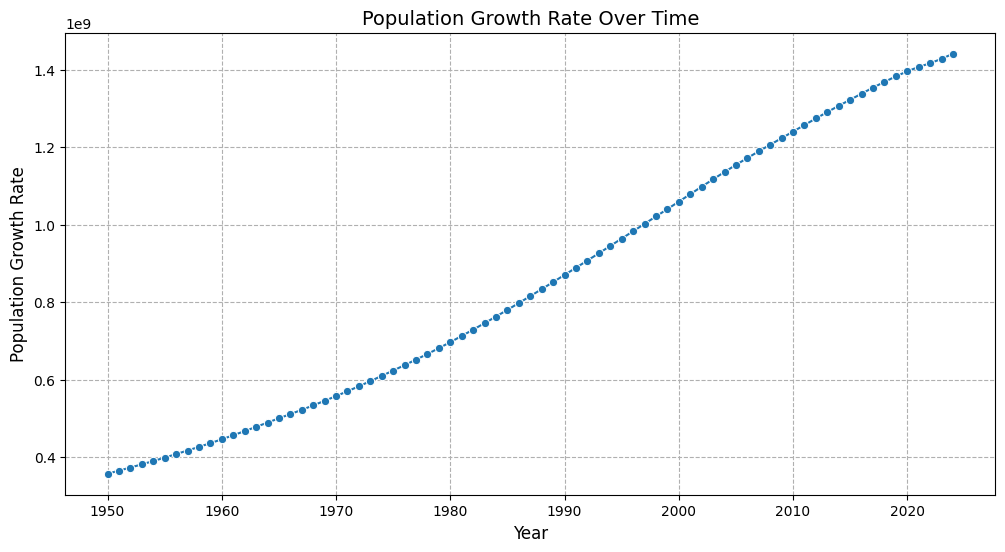

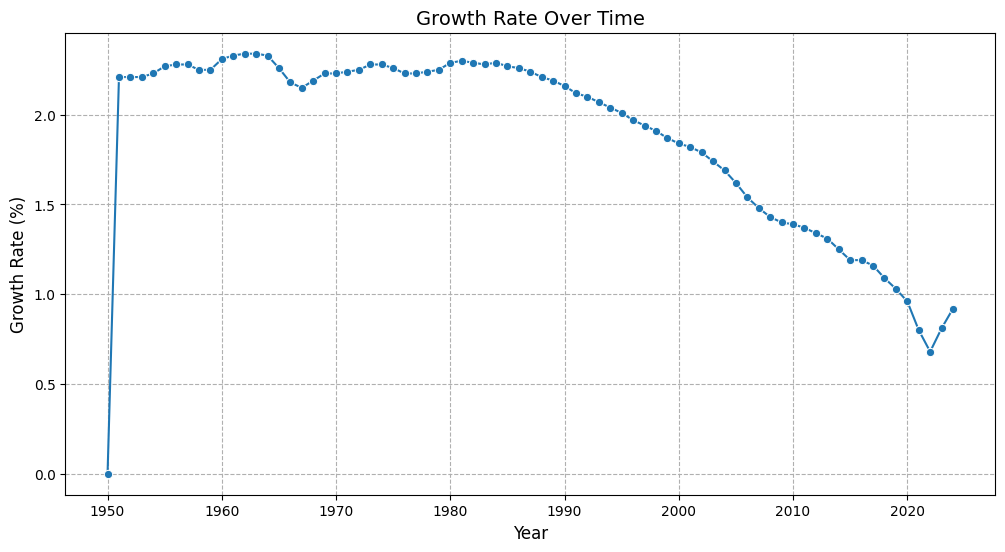

In [8]:
# Population Growth Rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Population Growth Rate', data=data, marker='o')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population Growth Rate', fontsize=12)
plt.title('Population Growth Rate Over Time', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--')
plt.show()

# Growth Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Growth Rate', data=data, marker='o')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.title('Growth Rate Over Time', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--')
plt.show()

# Compare Models

In [9]:
X = data.drop(columns=['Growth Rate'])
y = data['Growth Rate']
evaluate_models(X, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 2
[LightGBM] [Info] Start training from score 1.879867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Model,RMSE,R2
0,Linear Regression,0.269068,0.729537
1,Ridge Regression,0.322047,0.612546
2,Lasso Regression,0.517379,0.000000
3,ElasticNet,0.517379,0.000000
4,Decision Tree Regressor,0.000000,1.000000
5,Random Forest Regressor,0.115876,0.949839
6,Support Vector Machine Regressor,0.250710,0.765185
7,K-Nearest Neighbors Regressor,0.218423,0.821771
8,Gradient Boosting Regressor,0.004068,0.999938
9,XGBoost Regressor,0.001478,0.999992


# Evaluating XGBoost Regressor

In [10]:
from xgboost import XGBRegressor

X = data.drop(columns=['Growth Rate'])
y = data['Growth Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", round(r2,5))

R2 Score: 0.98628


In [12]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'actual': y_test, 'pred': y_pred})
comparison

,actual,pred
4,0.96,1.028498
63,2.33,2.250745
10,1.25,1.309524
0,0.92,0.809625
35,2.19,2.210255
61,2.34,2.337535
28,1.97,2.010649
12,1.34,1.372966
69,2.27,2.230144
64,2.31,2.250745


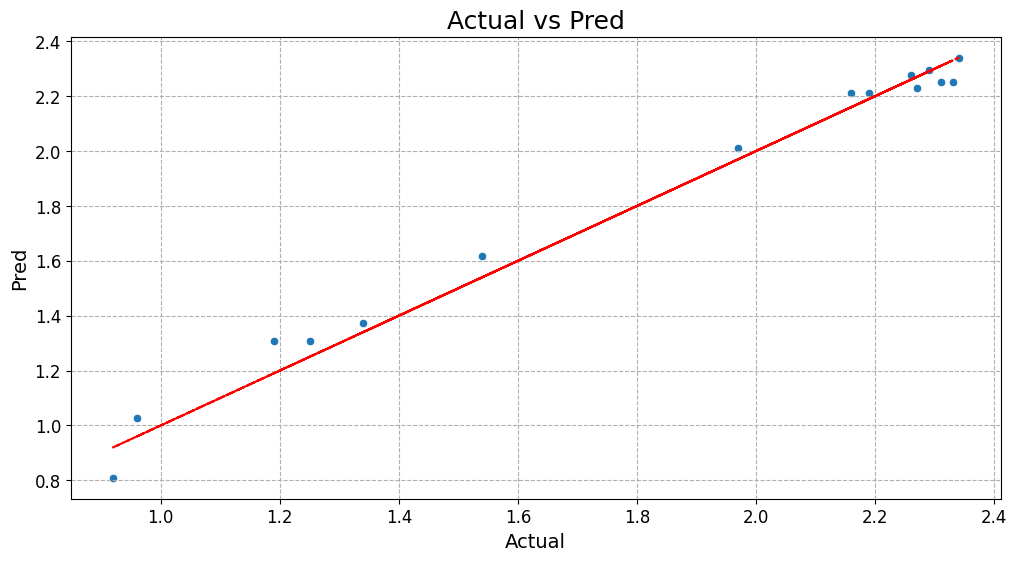

In [13]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='actual', y='pred', data=comparison)
plt.plot(comparison['actual'], comparison['actual'], color='red', linestyle='--')
plt.title('Actual vs Pred', fontsize=18)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Pred', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

# Thanks